In [1]:
import control as co
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from identify_it import IdentifyIt

def Graph(graphs, title=''):
    plt.figure(figsize=(6, 3))
    plt.title(title)
    for i in graphs:
        plt.plot(i[0],i[1], label = i[2],color = i[3]) 
    plt.ylabel('h(t)')
    plt.xlabel('t, sec')
    plt.legend(loc = 'best')
    plt.grid(1)
    plt.show()
# Graph(([t,h,"Задание",'b'],[tt,y,"Модель 3 порядка",'r'], [tt1,y1,"Модель 2 порядка",'g']))

Тест на ступеньке

Running method...
VIM is runing...
0.0001
Method has been worked


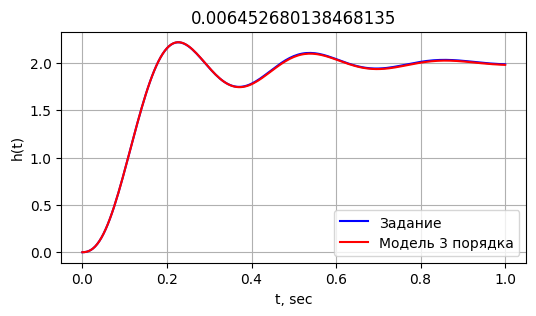

TransferFunction(array([1.02517488e-07, 1.97763131e-02, 1.99294444e+00]), array([2.47839759e-04, 4.51100916e-03, 1.18917825e-01, 1.00000000e+00]))

In [9]:
file_path = "test_data/time_value.txt"
x, y = np.loadtxt(file_path, delimiter=',', unpack=True)
ident = IdentifyIt(x, y, 3, 2)
error = ident.error
Graph(
    (
        [x,y,"Задание",'b'],
        [ident.x_m, ident.y_m, f"Модель {ident.degree} порядка",'r']
    ),
    title=f"{error}"
)
ident.model

Тест не на ступеньке

In [12]:
T1 = 1.2
T2 = 0.5
num = [1]
den = [T1*T2, T2, 1]
aper = co.tf(num, den)
aper

TransferFunction(array([1]), array([0.6, 0.5, 1. ]))

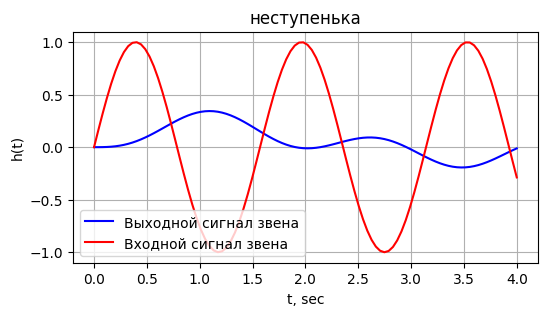

In [23]:
sin_t = np.linspace(0, 4, 100)
u_sin = np.sin(4*sin_t)
t_forced, y_forced = co.forced_response(aper, sin_t, u_sin)
Graph((
        [t_forced, y_forced, "Выходной сигнал звена", 'b'],
        [sin_t, u_sin, "Входной сигнал звена", 'r'],
    ),
    title="неступенька")

Running method...
VIM is runing...
0.0001
Method has been worked


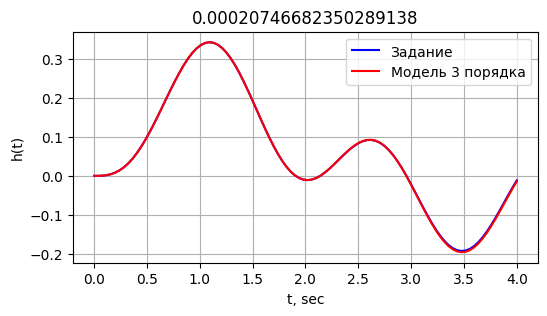

In [22]:
ident2 = IdentifyIt(t_forced, y_forced, 5, 2, u_sin)
error = ident2.error
Graph(
    (
        [t_forced, y_forced,"Задание",'b'],
        [ident2.x_m, ident2.y_m, f"Модель {ident.degree} порядка",'r']
    ),
    title=f"{error}"
)